In [2]:
import argparse
import uproot
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import awkward as ak
from pathlib import Path
import pickle

from uncertainties import ufloat, unumpy
#import atlas_mpl_style as ampl
#ampl.use_atlas_style(usetex=False)


def Read_Pickle(path):
    with open(path, 'rb') as f:
        data = pickle.load(f)
        
    return data 

In [15]:
period = "ADE"

var = "ntrk" #ntrk, bdt, newBDT

reweighting_map = {
        "none" : "NoReweighting",
        "quark" : "Reweighting_Quark_Factor",
        "gluon" : "Reweighting_Gluon_Factor"
    }
var_map = {
     "ntrk":'jet_nTracks',
     "bdt":'jet_trackBDT',
     "newBDT":'GBDT_newScore'
    }
    
    
WPs = [0.5, 0.6, 0.7, 0.8]
bin_edges = np.array([500, 600, 800, 1000, 1200, 1500, 2000])
bin_centers = 1/2 * (bin_edges[:-1] + bin_edges[1:])

In [16]:
nominal_SF_path = Path(f"/eos/user/w/wasu/NewWorkflow/results_CalculateSF/ADE/SFs_pkls/{var}_Reweighting_Quark_Factor/{var_map[var]}/SFs.pkl")
nominal_SF = Read_Pickle(nominal_SF_path)

#systs_JER = ["syst_JET_JER_EffectiveNP_1__1up","syst_JET_JER_EffectiveNP_2__1up","syst_JET_JER_EffectiveNP_3__1up","syst_JET_JER_EffectiveNP_4__1up","syst_JET_JER_EffectiveNP_5__1up","syst_JET_JER_EffectiveNP_6__1up","syst_JET_JER_EffectiveNP_7__1up","syst_JET_JER_EffectiveNP_8__1up","syst_JET_JER_EffectiveNP_9__1up","syst_JET_JER_EffectiveNP_10__1up","syst_JET_JER_EffectiveNP_11__1up","syst_JET_JER_EffectiveNP_12restTerm__1up"]
#systs = ["syst_JET_EffectiveNP_Modelling1__1up","syst_JET_EffectiveNP_Modelling2__1up","syst_JET_EffectiveNP_Modelling3__1up","syst_JET_EffectiveNP_Modelling4__1up","syst_JET_EffectiveNP_Detector1__1up","syst_JET_EffectiveNP_Detector2__1up","syst_JET_EtaIntercalibration_NonClosure_2018data__1up","syst_JET_EtaIntercalibration_NonClosure_highE__1up","syst_JET_EtaIntercalibration_NonClosure_posEta__1up","syst_JET_EtaIntercalibration_NonClosure_negEta__1up","syst_JET_Flavor_Composition__1up","syst_JET_Flavor_Response__1up","syst_JET_EtaIntercalibration_Modelling__1up","syst_JET_EffectiveNP_Mixed1__1up","syst_JET_EffectiveNP_Mixed2__1up","syst_JET_EffectiveNP_Mixed3__1up","syst_JET_PunchThrough_MC16__1up","syst_JET_Pileup_PtTerm__1up"]

SFs = {}
for syst in range(1,100):
    file = Path(f"/eos/user/w/wasu/NewWorkflow/results_CalculateSF/pdf_weight/{syst}/ADE/SFs_pkls/{var}_Reweighting_Quark_Factor/{var_map[var]}/SFs.pkl")
    SFs[syst] = Read_Pickle(file)



quark pdf:  [0.04369015 0.04401644 0.04508271 0.04298441 0.03943911 0.03205553] gluon pdf:  [0.01323796 0.01671555 0.02063691 0.02301505 0.02228726 0.02158367]
quark pdf:  [0.05960374 0.0598759  0.06145588 0.05864861 0.0534238  0.04420953] gluon pdf:  [0.02085698 0.02587234 0.0316756  0.03508933 0.03363377 0.03336251]
quark pdf:  [0.06993429 0.07016512 0.07217855 0.06910573 0.06244243 0.05067526] gluon pdf:  [0.02793865 0.0341577  0.04151217 0.04588544 0.04502573 0.04302551]
quark pdf:  [0.07605141 0.07619811 0.07860998 0.07493377 0.06730993 0.05436627] gluon pdf:  [0.03484655 0.04215328 0.05111106 0.05661649 0.05593431 0.05285809]


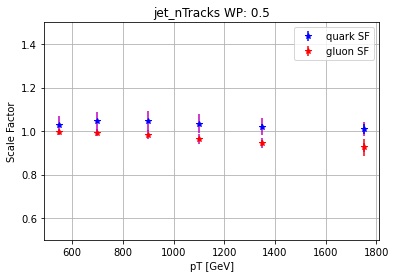

In [ ]:
err_syst2 = 0
err_syst2_g = 0

err_tot = 0
err_tot_g = 0

e1 = [0,0]
for WP in WPs:
    fig, ax = plt.subplots()
    SF_quark = nominal_SF[f"{var_map[var]}"][WP]['Quark']
    SF_gluon = nominal_SF[f"{var_map[var]}"][WP]['Gluon']
    #for syst,e in zip(systs, colours):
    for syst in SFs:
        SF_quark_syst = SFs[syst][f"{var_map[var]}"][WP]['Quark']
        SF_gluon_syst = SFs[syst][f"{var_map[var]}"][WP]['Gluon']

        err_syst = SF_quark_syst - SF_quark
        err_syst_g = SF_gluon_syst - SF_gluon
        err_syst2 += err_syst**2
        err_syst2_g += err_syst_g**2

        err_tot = np.sqrt(unumpy.nominal_values(err_syst2)/100)
        err_tot_g = np.sqrt(unumpy.nominal_values(err_syst2_g)/100)
            
            
    ax.errorbar(x = bin_centers, y = unumpy.nominal_values(SF_gluon), yerr = err_tot_g, linestyle='none',fmt='none', ecolor='m', marker='.')
    ax.errorbar(x = bin_centers, y = unumpy.nominal_values(SF_quark), yerr = err_tot, linestyle='none',fmt='none', ecolor='m', marker='.')

    #ax.errorbar(x = bin_centers, y = unumpy.nominal_values(SF_quark), yerr = unumpy.std_devs(SF_quark), linestyle='none',label= 'nominal gluon SF',fmt = 'r', marker='*')
    ax.errorbar(x = bin_centers, y = unumpy.nominal_values(SF_quark), yerr = unumpy.std_devs(SF_quark), linestyle='none',label= 'quark SF',fmt = 'b', marker='*')
    ax.errorbar(x = bin_centers, y = unumpy.nominal_values(SF_gluon), yerr = unumpy.std_devs(SF_gluon), linestyle='none',label= 'gluon SF',fmt = 'r', marker='*')

    ax.legend()

    ax.set_title(f"{var_map[var]} WP: {WP}")
    ax.set_xlabel("pT [GeV]")
    ax.set_ylabel("Scale Factor")
    ax.set_ylim(0.5, 1.5)
    ax.grid()
    print("quark pdf: ",err_tot, "gluon pdf: ",err_tot_g)
    plt.savefig(f"/eos/user/w/wasu/NewWorkflow/plots/{var_map[var]}_SF_PDF_{WP}.pdf")
